# Lag-Llama: Towards Foundation Models for Probabilistic Time Series Forecasting

![lag-llama-architecture](https://raw.githubusercontent.com/time-series-foundation-models/lag-llama/main/images/lagllama.webp)

Lag-Llama is the <b>first open-source foundation model for time series forecasting</b>!

[[Tweet Thread](https://twitter.com/arjunashok37/status/1755261111233114165)] [[Model Weights](https://huggingface.co/time-series-foundation-models/Lag-Llama)] [[Colab Demo on Zero-Shot Forecasting](https://colab.research.google.com/drive/1XxrLW9VGPlZDw3efTvUi0hQimgJOwQG6?usp=sharing)] [[GitHub](https://github.com/time-series-foundation-models/lag-llama)] [[Paper](https://arxiv.org/abs/2310.08278)]

💫 This Colab Demo shows you how to use the pretrained Lag-Llama model to get zero-shot predictions on time series, with the ability to load time series of different formats.


# Updates

## Update 05/Apr

Added section at the end on the importance of tuning the context length.


## Update 07/Mar

We have released a preliminary [Colab Demo 2](https://colab.research.google.com/drive/1uvTmh-pe1zO5TeaaRVDdoEWJ5dFDI-pA?usp=sharing) for finetuning. A detailed demo with instructions for benchmarking is coming soon along with the tutorial.

Note that Colab Demo 2 is for finetuning, while Colab Demo 1 (this Colab) is for zero-shot forecasting.

## Update 17/Feb

This Colab demo 1 for zero-shot forecasting is an update to the [previous Colab demo 1](https://colab.research.google.com/drive/13HHKYL_HflHBKxDWycXgIUAHSeHRR5eo?usp=sharing). In this notebook, we show **how one can load time series in different formats**.

If your time series is of a format that is not described here, please create [an issue in our GitHub repository](https://github.com/time-series-foundation-models/lag-llama/issues), and we can discuss how to load it.

-------


**Please make a copy of this notebook if you would like to save your changes (File -> Save a copy in ...)**

# Prepare the repository

We first clone and install the required packages from the [GitHub repository](https://github.com/time-series-foundation-models/lag-llama/) that has the Lag-Llama architecture.



In [1]:
!git clone https://github.com/time-series-foundation-models/lag-llama/

Cloning into 'lag-llama'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 272 (delta 93), reused 75 (delta 75), pack-reused 162
Receiving objects: 100% (272/272), 218.53 KiB | 8.74 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [2]:
cd /content/lag-llama

/content/lag-llama


In [3]:
!pip install -r requirements.txt --quiet # this could take some time # ignore the errors displayed by colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 71.4 MB/s eta 0:00:00
ERROR: pip's dependency resol

We then download our pretrained model weights from [HuggingFace](https://huggingface.co/time-series-foundation-models/Lag-Llama) 🤗

In [4]:
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir /content/lag-llama

lag-llama.ckpt: 100% 29.5M/29.5M [00:00<00:00, 39.0MB/s]
Download complete. Moving file to /content/lag-llama/lag-llama.ckpt
/content/lag-llama/lag-llama.ckpt


We import the required packages and the lag llama estimator object which we can use to make predictions.

In [2]:
%cd /content/lag-llama

/content/lag-llama


In [6]:
pip install gluonts[torch]==0.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: gluonts
    Found existing installation: gluonts 0.15.1
    Uninstalling gluonts-0.15.1:
      Successfully uninstalled gluonts-0.15.1


In [3]:
from itertools import islice

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import torch
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from gluonts.dataset.pandas import PandasDataset
import pandas as pd

from lag_llama.gluon.estimator import LagLlamaEstimator

# Lag-Llama prediction function

We create a function for Lag-Llama inference that we can reuse for all different types of dataset below. This function returns the predictions for the given prediction horizon. The forecast will be of shape (`num_samples`, `prediction_length`), where `num_samples` is the number of samples sampled from the predicted probability distribution for each timestep.


In [14]:
def get_lag_llama_predictions(dataset, prediction_length, device, context_length=32, use_rope_scaling=False, num_samples=100):
    ckpt = torch.load("lag-llama.ckpt", map_location=device) # Uses GPU since in this Colab we use a GPU.
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    rope_scaling_arguments = {
        "type": "linear",
        "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
    }

    estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length, # Lag-Llama was trained with a context length of 32, but can work with any context length

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        rope_scaling=rope_scaling_arguments if use_rope_scaling else None,

        batch_size=1,
        num_parallel_samples=100,
        device=device,
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)

    return forecasts, tss

# Loading datasets of different types

We expand upon how one can support loading data stored in different formats. This part of the demo uses the tutorial by the authors of GluonTS at https://ts.gluon.ai/stable/tutorials/data_manipulation/pandasdataframes.html. We thank the authors of GluonTS for putting together such a detailed tutorial.

## Important Points to Note

1. The prediction function provided in this notebook performs a prediction autoregressively for the last `prediction_length` steps in the dataset passed.

For the time being, if you would like to perform prediction, please include in the CSV/dataframe the timestamps you want to perform prediction for (with a dummy value), and set the prediction length to the required horizon.

2. Please keep in mind that Lag-Llama needs a minimum context of `32` timestamps before the prediction timestamp starts. Beyond the `32` timestamps, Lag-Llama can use a context of upto `1092` more timestamps in history for the lags - this part is optional but you will find that as you give more context upto `(32+) 1092` timestamps, Lag-Llama's performance will improve.

The context length passed below should not be changed and kept at 32 nevertheless. Lag-Llama will automatically use context beyond 32 for the lags, if available.


## 1. Loading data from a long CSV

We are given multiple time series stacked on top of each other in a dataframe with an `item_id` column that distinguishes different series.

The `item_id` is required only when your dataset has multiple series.

When your CSV has just one series, `item_id` is not required. In this case, when creating the `PandasDataset`,  `item_id` need not be passed.

In [5]:
import pandas as pd
from gluonts.dataset.pandas import PandasDataset

url = (
    "https://gist.githubusercontent.com/rsnirwan/a8b424085c9f44ef2598da74ce43e7a3"
    "/raw/b6fdef21fe1f654787fa0493846c546b7f9c4df2/ts_long.csv"
)
df = pd.read_csv(url, index_col=0, parse_dates=True)
df

,target,item_id
2021-01-01 00:00:00,-1.3378,A
2021-01-01 01:00:00,-1.6111,A
2021-01-01 02:00:00,-1.9259,A
2021-01-01 03:00:00,-1.9184,A
2021-01-01 04:00:00,-1.9168,A
...,...,...
2021-01-10 19:00:00,1.2349,J
2021-01-10 20:00:00,1.1525,J
2021-01-10 21:00:00,1.1485,J
2021-01-10 22:00:00,1.3248,J


In [10]:
# Set numerical columns as float32
for col in df.columns:
    # Check if column is not of string type
    if df[col].dtype != 'object' and pd.api.types.is_string_dtype(df[col]) == False:
        df[col] = df[col].astype('float32')

# Create the Pandas
dataset = PandasDataset.from_long_dataframe(df, target="target", item_id="item_id")

backtest_dataset = dataset
prediction_length = 24  # Define your prediction length. We use 24 here since the data is of hourly frequency
num_samples = 100 # number of samples sampled from the probability distribution for each timestep
device = torch.device("cuda:0") # You can switch this to CPU or other GPUs if you'd like, depending on your environment

### Get predictions

We perform zero-shot inference.

In [15]:
forecasts, tss = get_lag_llama_predictions(backtest_dataset, prediction_length, device, num_samples)

-----------------
forecast_it  <generator object PyTorchPredictor.predict at 0x7e651a1c4b30>
ts_it <map object at 0x7e651a291ea0>


`forecasts` is a list of size `num_series` where `num_series` is the number of time series in your dataset. The samples can be accessed with the `.samples` object from each forecast.

`tss` is the ground truth time series, which is useful to visualize when plotting. You can ignore it otherwise.

In [17]:
forecasts

[gluonts.model.forecast.SampleForecast(info=None, item_id='A', samples=array([[-0.20875345, -0.00627995,  0.21411219, ...,  1.9696687 ,
          1.3253859 ,  0.46464765],
        [-0.6435814 , -0.62188154, -0.8692033 , ..., -0.39011952,
         -0.92637545, -0.9716522 ],
        [-0.6110948 , -0.76772   , -0.9285507 , ..., -0.1419241 ,
         -0.47242743, -0.5933349 ],
        ...,
        [-0.27594063, -0.48336327, -0.7737069 , ..., -0.04800883,
         -0.5668386 , -0.8773907 ],
        [-0.36218178, -0.26977587, -0.58013207, ...,  0.8544097 ,
          0.06349808, -0.03970967],
        [-0.65975827, -0.52439153, -0.5143983 , ..., -0.2727946 ,
         -0.4663806 , -0.8100284 ]], dtype=float32), start_date=Period('2021-01-10 00:00', 'H')),
 gluonts.model.forecast.SampleForecast(info=None, item_id='B', samples=array([[ 0.5297223 ,  0.28402412,  0.1819018 , ...,  0.32784748,
          0.5905513 ,  0.38351947],
        [ 0.16660222,  0.11053295, -0.117038  , ...,  0.32997936,
     

In [ ]:
len(forecasts)

10

In [16]:
forecasts[0].samples.shape

(100, 24)

We plot the forecasts of our model on this dataset, along with the ground truth.

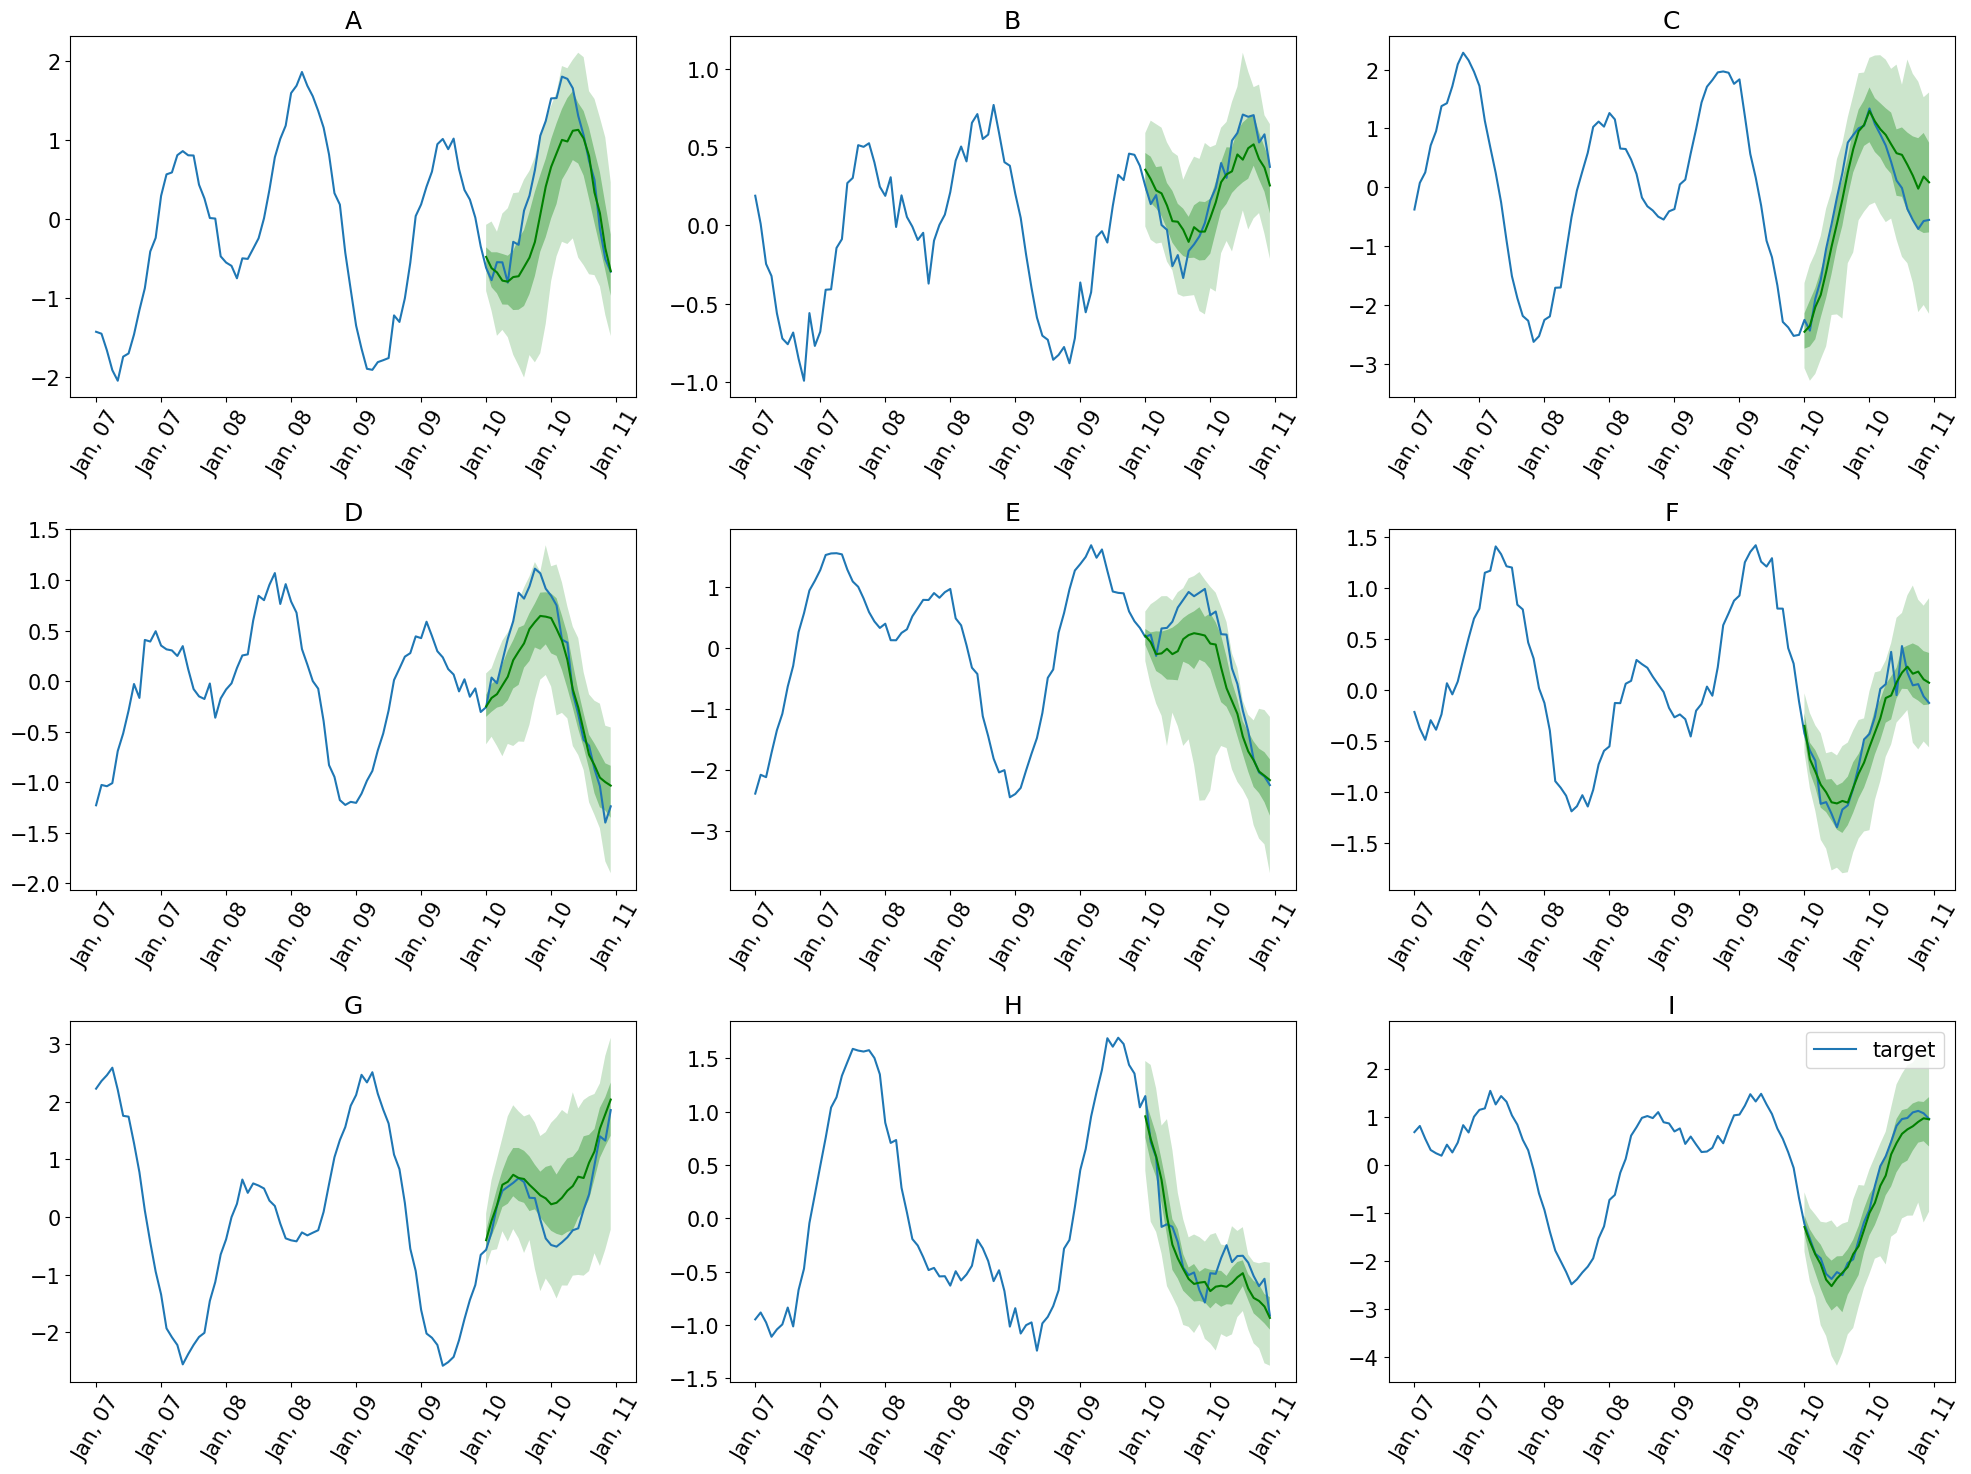

In [26]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

# Iterate through the first 9 series, and plot the predicted samples
for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)


    plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

## 2. Loading data with missing values

In case the timestamp column is not evenly spaced and monotonically increasing we get an error when using PandasDataset. Here we show how to fill in the gaps that are missing.

To demonstrate this, let’s first remove some random rows from the long dataset.

In [ ]:
import pandas as pd
import numpy as np
from gluonts.dataset.pandas import PandasDataset

url = (
    "https://gist.githubusercontent.com/rsnirwan/a8b424085c9f44ef2598da74ce43e7a3"
    "/raw/b6fdef21fe1f654787fa0493846c546b7f9c4df2/ts_long.csv"
)
df = pd.read_csv(url, index_col=0, parse_dates=True)
remove_ind = np.random.choice(np.arange(df.shape[0]), size=100, replace=False)
mask = [False if i in remove_ind else True for i in range(df.shape[0])]
df_missing_val = df.loc[mask, :]  # dataframe with 100 rows removed from df
df

,target,item_id
2021-01-01 00:00:00,-1.3378,A
2021-01-01 01:00:00,-1.6111,A
2021-01-01 02:00:00,-1.9259,A
2021-01-01 03:00:00,-1.9184,A
2021-01-01 04:00:00,-1.9168,A
...,...,...
2021-01-10 19:00:00,1.2349,J
2021-01-10 20:00:00,1.1525,J
2021-01-10 21:00:00,1.1485,J
2021-01-10 22:00:00,1.3248,J


Now, we group by the `item_id` and reindex each of the grouped dataframes. Reindexing, as it is done below, will add new rows with `NaN` values where the data is missing.
If required, the user can then use the `fillna()` method on each dataframe to fill in desired value.

However, Lag-Llama supports datasets with `NaN` rows and the imputation is completely optional.


In [ ]:
# Get the max end date
max_end = max(df.groupby("item_id").apply(lambda _df: _df.index[-1]))
dfs_dict = {}
for item_id, gdf in df_missing_val.groupby("item_id"):
    # Get the full (regular) date range
    new_index = pd.date_range(gdf.index[0], end=max_end, freq="1H")
    # Reindex the dataframe
    dfs_dict[item_id] = gdf.reindex(new_index).drop("item_id", axis=1)
    # Conver the columns to float32 for lag-llama
    for col in dfs_dict[item_id]:
        # Check if column is not of string type
        if dfs_dict[item_id][col].dtype != 'object' and pd.api.types.is_string_dtype(dfs_dict[item_id][col]) == False:
            dfs_dict[item_id][col] = dfs_dict[item_id][col].astype('float32')

# Create a PandasDataset
ds = PandasDataset(dfs_dict, target="target")

In [ ]:
backtest_dataset = ds
prediction_length = 24  # Define your prediction length. We use 24 here since the data is of hourly frequency
num_samples = 100 # number of samples sampled from the probability distribution for each timestep
device = torch.device("cuda:0") # You can switch this to CPU or other GPUs if you'd like, depending on your environment

### Get predictions

We perform zero-shot inference.

In [ ]:
forecasts, tss = get_lag_llama_predictions(backtest_dataset, prediction_length, device, num_samples)

`forecasts` is a list of size `num_series` where `num_series` is the number of time series in your dataset. The samples can be accessed with the `.samples` object from each forecast.

`tss` is the ground truth time series, which is useful to visualize when plotting. You can ignore it otherwise.

In [ ]:
len(forecasts)

10

In [ ]:
forecasts[0].samples.shape

(100, 24)

We plot the forecasts of our model on this dataset.

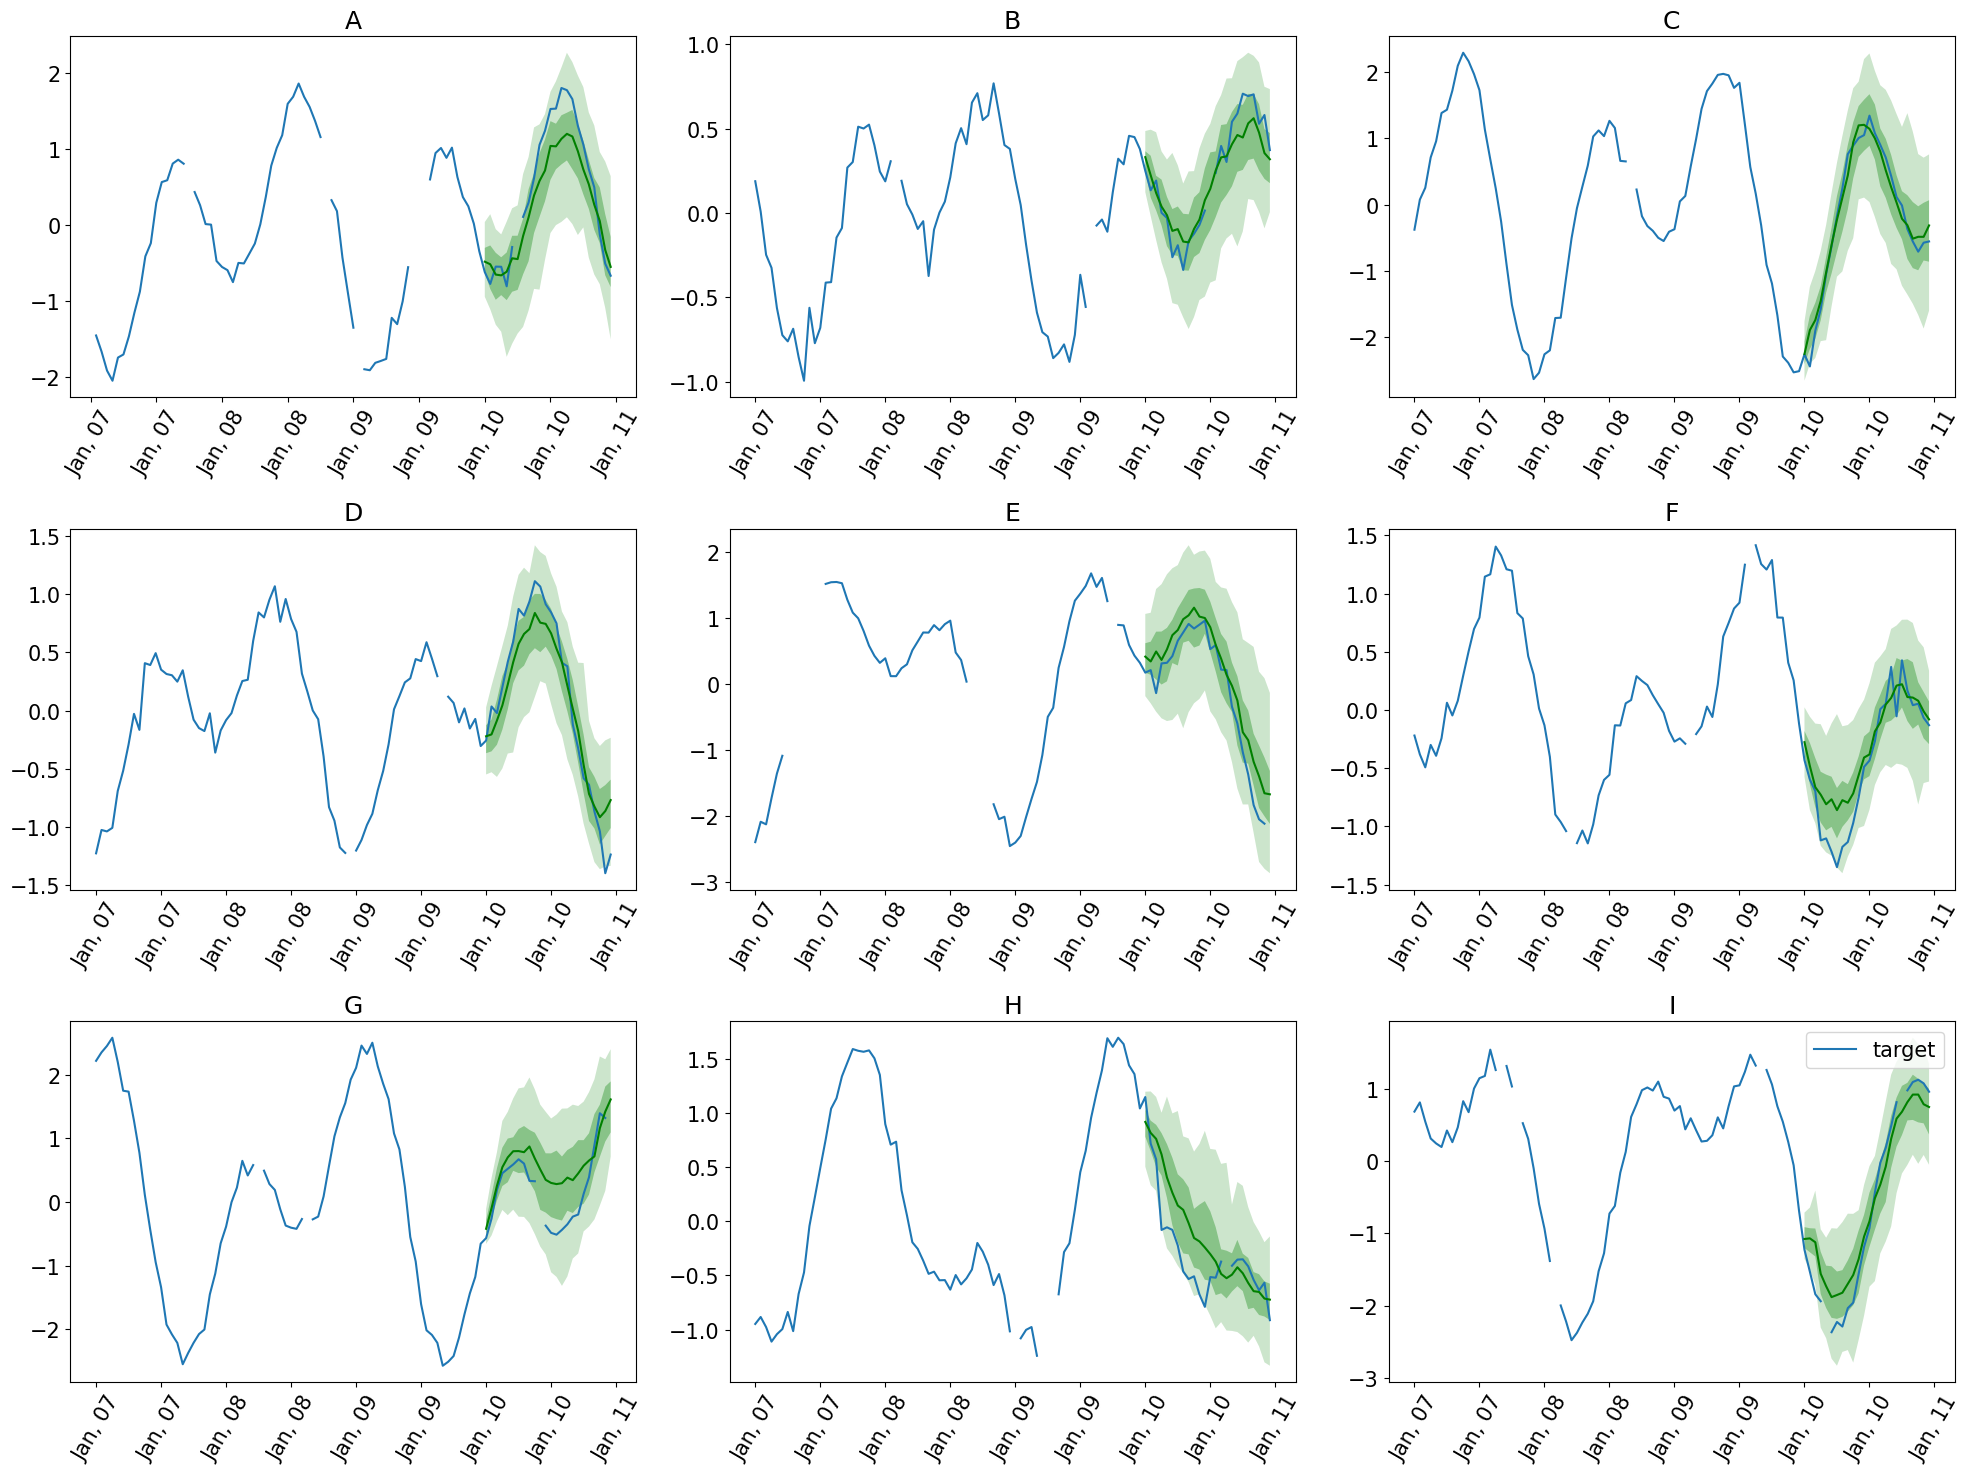

In [ ]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

# Iterate through the first 9 series, and plot the predicted samples
for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

## 3. Loading data from a wide dataframe

Here, we are given data in the `wide` format, where time series are stacked side-by-side in a `DataFrame`. We can simply turn this into a dictionary of `Series` objects with dict, and construct a `PandasDataset` with it.


### Load the dataset

In [ ]:
import pandas as pd
from gluonts.dataset.pandas import PandasDataset

url_wide = (
    "https://gist.githubusercontent.com/rsnirwan/c8c8654a98350fadd229b00167174ec4"
    "/raw/a42101c7786d4bc7695228a0f2c8cea41340e18f/ts_wide.csv"
)
df_wide = pd.read_csv(url_wide, index_col=0, parse_dates=True)
df_wide

,A,B,C,D,E,F,G,H,I,J
2021-01-01 00:00:00,-1.3378,0.1268,-0.3645,-1.0864,-2.3803,-0.2447,2.2647,-0.7917,0.7071,1.3763
2021-01-01 01:00:00,-1.6111,0.0926,-0.1364,-1.1613,-2.1421,-0.3477,2.4262,-0.9609,0.6413,1.2750
2021-01-01 02:00:00,-1.9259,-0.1420,0.1063,-1.0405,-2.1426,-0.3271,2.4434,-0.9034,0.4323,0.6767
2021-01-01 03:00:00,-1.9184,-0.4930,0.6269,-0.8531,-1.7060,-0.3088,2.4307,-0.9602,0.3193,0.5150
2021-01-01 04:00:00,-1.9168,-0.5057,0.9419,-0.7666,-1.4287,-0.4284,2.3258,-1.2504,0.3660,0.1708
...,...,...,...,...,...,...,...,...,...,...
2021-01-10 19:00:00,0.7328,0.6937,-0.3679,-0.6389,-1.3643,0.1667,0.3918,-0.4162,0.9811,1.2349
2021-01-10 20:00:00,0.4957,0.7043,-0.5553,-0.8691,-1.8283,0.0413,0.8977,-0.5412,1.0969,1.1525
2021-01-10 21:00:00,-0.1209,0.5297,-0.7084,-1.0384,-2.0439,0.0534,1.3973,-0.6366,1.1286,1.1485
2021-01-10 22:00:00,-0.5072,0.5816,-0.5735,-1.3990,-2.1105,-0.0674,1.3225,-0.5672,1.0786,1.3248


In [ ]:
# Convert numerical columns to float 32 format for lag-llama
for col in df_wide.columns:
    # Check if column is not of string type
    if df_wide[col].dtype != 'object' and pd.api.types.is_string_dtype(df_wide[col]) == False:
        df_wide[col] = df_wide[col].astype('float32')

# Create a PandasDataset
ds = PandasDataset(dict(df_wide))

backtest_dataset = ds
prediction_length = 24  # Define your prediction length (e.g., 24 here since the data frequency is hourly).
num_samples = 100 # number of samples sampled from the probability distribution for each timestep
device = torch.device("cuda:0") # You can switch this to CPU or other GPUs if you'd like, depending on your environment

### Get predictions

We perform zero-shot inference.

In [ ]:
forecasts, tss = get_lag_llama_predictions(backtest_dataset, prediction_length, device, num_samples)

`forecasts` is a list of size `num_series` where `num_series` is the number of time series in your dataset. The samples can be accessed with the `.samples` object from each forecast.

`tss` is the ground truth time series, which is useful to visualize when plotting. You can ignore it otherwise.

In [ ]:
len(forecasts)

10

In [ ]:
forecasts[0].samples.shape

(100, 24)

We plot the forecasts of our model on this dataset.

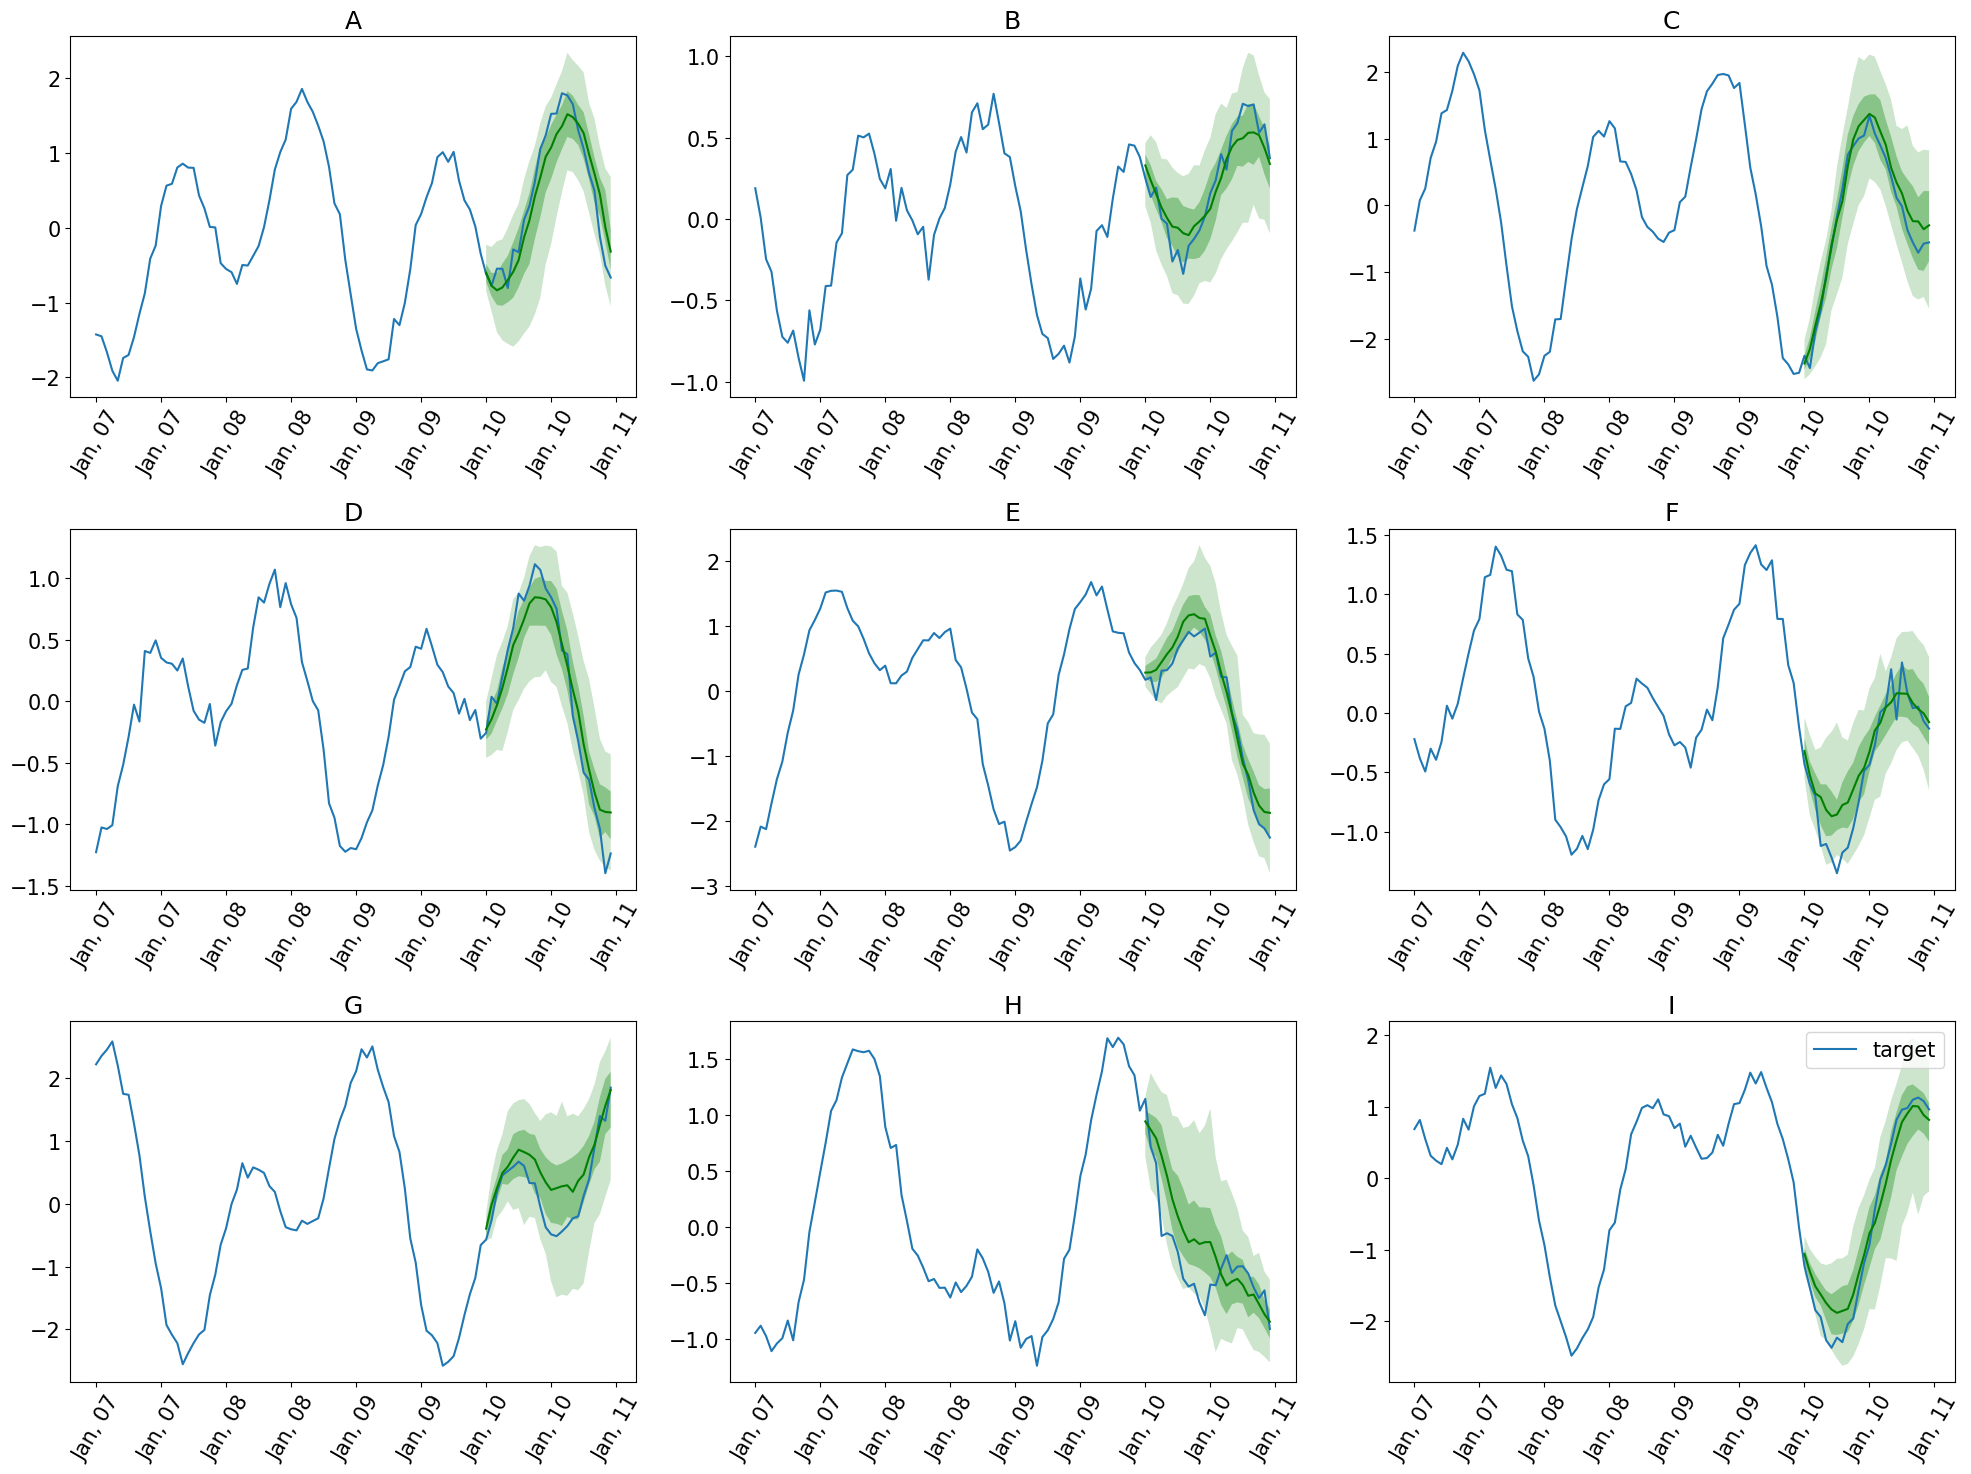

In [ ]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

# Iterate through the first 9 series, and plot the predicted samples
for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

# Example demo on the importance of tuning context length for zero-shot forecasting


This section was made to demonstrate the important of tuning the `context_length` hyperparameter when using the model zero-shot.

We use the [aus_retail](https://www.rdocumentation.org/packages/tsibbledata/versions/0.4.1/topics/aus_retail) dataset here.

In [ ]:
# To filter warnings for readability
import warnings
warnings.simplefilter("ignore", UserWarning)

# For this dataset
from gluonts.dataset.common import ListDataset

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/dannymorris/ac176586e0236bd9278e9c81e06851a8/raw/54fd7c7520702d3dd7d4bd59c9dfbed5385af438/aus_retail.csv")
df = df.set_index('Month')

df.head()

,Australian_Capital_Territory_Cafes__restaurants_and_catering_services,Australian_Capital_Territory_Cafes__restaurants_and_takeaway_food_services,Australian_Capital_Territory_Clothing__footwear_and_personal_accessory_retailing,Australian_Capital_Territory_Clothing_retailing,Australian_Capital_Territory_Department_stores,Australian_Capital_Territory_Electrical_and_electronic_goods_retailing,Australian_Capital_Territory_Food_retailing,Australian_Capital_Territory_Footwear_and_other_personal_accessory_retailing,Australian_Capital_Territory_Furniture__floor_coverings__houseware_and_textile_goods_retailing,Australian_Capital_Territory_Hardware__building_and_garden_supplies_retailing,...,Western_Australia_Household_goods_retailing,Western_Australia_Liquor_retailing,Western_Australia_Newspaper_and_book_retailing,Western_Australia_Other_recreational_goods_retailing,Western_Australia_Other_retailing,Western_Australia_Other_retailing_n_e_c_,Western_Australia_Other_specialised_food_retailing,Western_Australia_Pharmaceutical__cosmetic_and_toiletry_goods_retailing,Western_Australia_Supermarket_and_grocery_stores,Western_Australia_Takeaway_food_services
Month,,,,,,,,,,,,,,,,,,,,,
1982-04-01,4.4,7.6,5.9,3.7,10.3,4.4,15.5,2.2,2.7,2.6,...,50.4,12.3,9.7,6.5,42.1,11.3,13.1,14.6,96.6,10.4
1982-05-01,3.4,6.7,5.9,3.8,10.6,4.9,15.1,2.1,3.0,3.3,...,57.9,11.8,11.0,7.2,45.0,11.6,13.4,15.2,96.4,10.3
1982-06-01,3.6,7.1,5.1,3.2,9.9,4.8,15.5,2.0,2.5,2.7,...,54.4,11.3,10.7,6.6,42.5,10.9,13.5,14.5,95.6,10.4
1982-07-01,4.0,7.5,5.4,3.4,8.8,5.1,16.1,2.1,2.8,2.4,...,56.2,12.1,9.0,7.0,42.0,11.4,13.8,14.6,103.3,10.3
1982-08-01,3.6,7.3,5.0,3.1,8.8,4.6,15.8,2.0,2.8,2.7,...,55.0,12.0,9.1,6.8,42.1,10.9,13.3,15.3,96.6,10.1


In [ ]:
metadata = {
    'prediction_length': 12,
    'freq': '1M'
}

In [ ]:
train_data = [{"start": df.index[0], "target": df[i].values[:-metadata['prediction_length']]} for i in df.columns]
test_data = [{"start": df.index[0], "target": df[i].values} for i in df.columns]

train_ds = ListDataset(
    data_iter=train_data,
    freq=metadata['freq']
)

test_ds = ListDataset(
    data_iter=test_data,
    freq=metadata['freq']
)
device = torch.device("cuda:0") # You can switch this to CPU or other GPUs if you'd like, depending on your environment

## Zero-Shot Forecasting: Tuning the context length

Below, we get zero-shot forecasts of Lag-Llama on this data, but try a variety of context lengths.

### Get predictions with the default context length ($32$)

In [ ]:
forecasts_ctx_len_32, tss_ctx_len_32 = get_lag_llama_predictions(test_ds, prediction_length=metadata['prediction_length'], device=device, \
                                           context_length=32, use_rope_scaling=False, num_samples=30)
forecasts_ctx_len_32 = list(forecasts_ctx_len_32)
tss_ctx_len_32 = list(tss_ctx_len_32)

evaluator = Evaluator()
agg_metrics_ctx_len_32, ts_metrics_ctx_len_32 = evaluator(iter(tss_ctx_len_32), iter(forecasts_ctx_len_32))
print("CRPS:", agg_metrics_ctx_len_32['mean_wQuantileLoss'])

Running evaluation: 152it [00:00, 5881.04it/s]


CRPS: 0.07745884580723007


We get a CRPS of **0.0774**.


### Get predictions with a context length of $64$.



In [ ]:
forecasts_ctx_len_64, tss_ctx_len_64 = get_lag_llama_predictions(test_ds, prediction_length=metadata['prediction_length'], device=device, \
                                           context_length=64, use_rope_scaling=False, num_samples=30)
forecasts_ctx_len_64 = list(forecasts_ctx_len_64)
tss_ctx_len_64 = list(tss_ctx_len_64)

evaluator = Evaluator()
agg_metrics_ctx_len_64, ts_metrics_ctx_len_64 = evaluator(iter(tss_ctx_len_64), iter(forecasts_ctx_len_64))
print("CRPS:", agg_metrics_ctx_len_64['mean_wQuantileLoss'])

Running evaluation: 152it [00:00, 5517.20it/s]


CRPS: 0.07220623044285954


We get a better CRPS of **0.0722**.

Now enable **RoPE scaling** which better equips the model in handling large context lengths (larger than 32 in this case). This is done by passing `use_rope_scaling=True` to the `get_lag_llama_predictions` function.

In [ ]:
forecasts_ctx_len_64_rope_scaled, tss_ctx_len_64_rope_scaled = get_lag_llama_predictions(test_ds, prediction_length=metadata['prediction_length'], device=device, \
                                           context_length=64, use_rope_scaling=True, num_samples=30)
forecasts_ctx_len_64_rope_scaled = list(forecasts_ctx_len_64_rope_scaled)
tss_ctx_len_64_rope_scaled = list(tss_ctx_len_64_rope_scaled)

evaluator = Evaluator()
agg_metrics_ctx_len_64_rope_scaled, ts_metrics_ctx_len_64_rope_scaled = evaluator(iter(tss_ctx_len_64_rope_scaled), iter(forecasts_ctx_len_64_rope_scaled))
print("CRPS:", agg_metrics_ctx_len_64_rope_scaled['mean_wQuantileLoss'])

Running evaluation: 152it [00:00, 5895.67it/s]


CRPS: 0.07104961715320961


We get a better CRPS of **0.0710**. This shows that RoPE scaling is important when increasing the context length.

### Get predictions with a context length of $128$.


RoPE scaling is enabled here as well.

In [ ]:
forecasts_ctx_len_128_rope_scaled, tss_ctx_len_128_rope_scaled = get_lag_llama_predictions(test_ds, prediction_length=metadata['prediction_length'], device=device, \
                                           context_length=128, use_rope_scaling=True, num_samples=30)
forecasts_ctx_len_128_rope_scaled = list(forecasts_ctx_len_128_rope_scaled)
tss_ctx_len_128_rope_scaled = list(tss_ctx_len_128_rope_scaled)

evaluator = Evaluator()
agg_metrics_ctx_len_128_rope_scaled, ts_metrics_ctx_len_128_rope_scaled = evaluator(iter(tss_ctx_len_128_rope_scaled), iter(forecasts_ctx_len_128_rope_scaled))
print("CRPS:", agg_metrics_ctx_len_128_rope_scaled['mean_wQuantileLoss'])

Running evaluation: 152it [00:00, 5502.06it/s]


CRPS: 0.06576577186286284


We get a better CRPS of **0.0657**.

So far, increasing context length (and using it with RoPE scaling has resulted in better performance)

### Get predictions with a context length of $256$.

Let's try increasing it further.


In [ ]:
forecasts_ctx_len_256_rope_scaled, tss_ctx_len_256_rope_scaled = get_lag_llama_predictions(test_ds, prediction_length=metadata['prediction_length'], device=device, \
                                           context_length=256, use_rope_scaling=True, num_samples=30)
forecasts_ctx_len_256_rope_scaled = list(forecasts_ctx_len_256_rope_scaled)
tss_ctx_len_256_rope_scaled = list(tss_ctx_len_256_rope_scaled)

evaluator = Evaluator()
agg_metrics_ctx_len_256_rope_scaled, ts_metrics_ctx_len_256_rope_scaled = evaluator(iter(tss_ctx_len_256_rope_scaled), iter(forecasts_ctx_len_256_rope_scaled))
print("CRPS:", agg_metrics_ctx_len_256_rope_scaled['mean_wQuantileLoss'])

Running evaluation: 152it [00:00, 6991.12it/s]


CRPS: 0.07051453819039323


We get a better CRPS of **0.0705**.

We see that when context length is increased to $256$, the model's performance drops. This indicates that tuning the context length for each dataset/task is very important, and the largest possible context length is not always the best in the case of Lag-Llama at the moment.